In [154]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt,pi,exp

In [4]:
Datos = pd.read_csv("200502COVID19MEXICO.csv",encoding="latin-1")
Datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-02,0ceb0f,1,4,1,1,1,1,1,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-02,1d9580,1,12,2,2,15,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-05-02,119b76,1,4,21,2,21,21,114,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-02,0e6c05,1,4,2,2,2,2,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-02,140d7f,1,12,29,1,29,29,21,1,...,2,2,2,2,2,2,99,MÃ©xico,99,97


In [216]:
X = list(Datos[(Datos.EDAD>5)&(Datos.EDAD<90)].EDAD)[0:500]
n = len(X)

In [217]:
a,b = min(X),max(X)

In [218]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in X if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in X if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    # fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
# plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)])

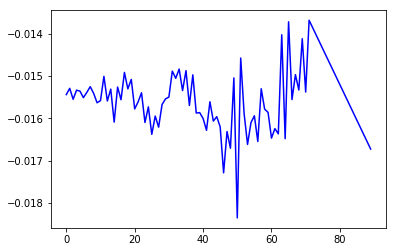

In [219]:
plt.plot([Error(m) for m in range(10,100)],color='b')

In [242]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in X if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in X if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

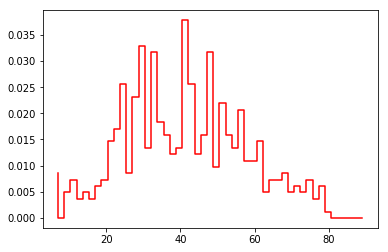

In [222]:
Histograma(50)

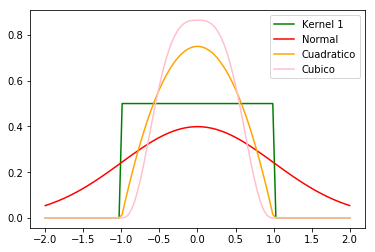

In [223]:
plt.plot(np.linspace(-2,2,100),[1/2*(abs(x)<=1) for x in np.linspace(-2,2,100)],label='Kernel 1',color='g')
plt.plot(np.linspace(-2,2,100),[1/sqrt(2*pi)*exp(-x**2/2) for x in np.linspace(-2,2,100)],label='Normal',color='r')
plt.plot(np.linspace(-2,2,100),[3/4*(1-x**2)*(abs(x)<=1) for x in np.linspace(-2,2,100)],label='Cuadratico',color='orange')
plt.plot(np.linspace(-2,2,100),[70/81*(1-abs(x)**3)**3*(abs(x)<=1) for x in np.linspace(-2,2,100)],label='Cubico',color='pink')

plt.legend()

In [224]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)

In [257]:
h = 2.1
fn = lambda x:(1/n)*sum([(1/h)*K((x-X[i])/h) for i in range(n)]) 

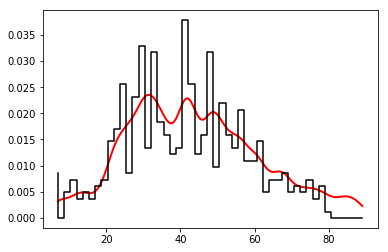

In [259]:
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(50)

In [235]:
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((X[i]-X[j])/h) for i in range(n)]) for i in range(n)])+2/(n*h)*K(0)

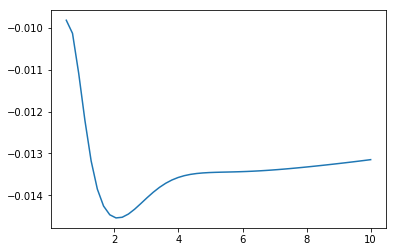

In [256]:
plt.plot(np.linspace(0.5,10),[J(h) for h in np.linspace(0.5,10)])

In [262]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [269]:
@interact(h=widgets.FloatSlider(
    value=2.1,
    min=0,
    max=8,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Suavizamiento(h):
    fn = lambda x:(1/n)*sum([(1/h)*K((x-X[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(FloatSlider(value=2.1, continuous_update=False, description='h:', max=8.0, readout_forma…

In [278]:
@interact(m=widgets.IntSlider(
    value=50,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=2.1,
    min=0,
    max=8,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in X if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in X if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-X[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=50, continuous_update=False, description='m:', max=200, min=5), FloatSli…